# Setup

In [1]:
%matplotlib ipympl
import matplotlib, matplotlib.pyplot
matplotlib.pyplot.ioff()

import sys
sys.path.append("..")

from pathlib import Path
from analyze import Apps
from typing import cast

cache_dir = Path("../data")

# Queries

## Apps running navigation preview

In [2]:
with Apps.init(cache_dir) as apps:
        apps.where(lambda app: ".navigation." in app.frontend_version) \
        .select({"Frontend version": lambda app: app.frontend_version}) \
        .table()

Env,Org,App,Frontend version
tt02,ssb,ra0481-02,4.16.1-pr.543.navigation.148ab6d3
tt02,ssb,ra0756-01,4.17.1-pr.605.navigation.b716a1c3
tt02,ttd,navigation-test,4.17.1-pr.605.navigation.b716a1c3


Count: 3


## Locked frontend versions (v4)

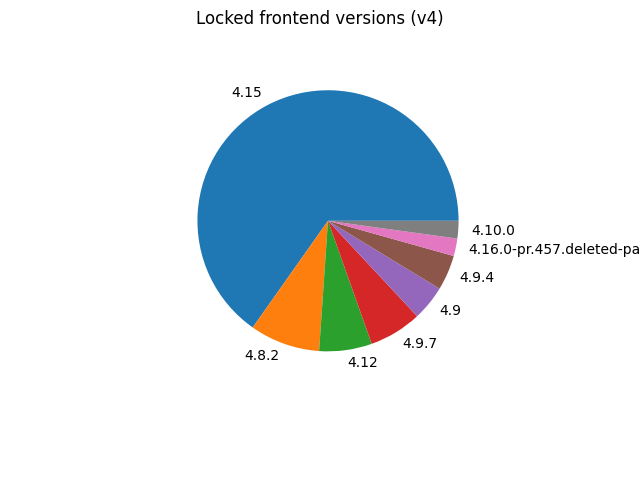

Frontend version,Count
4.15,30
4.8.2,4
4.12,3
4.9.7,3
4.9,2
4.9.4,2
4.16.0-pr.457.deleted-parties.a5abb3be,1
4.10.0,1


Count: 8


In [3]:
with Apps.init(cache_dir) as apps:
    frontend_versions = apps.where(lambda app: app.env == "prod" and app.frontend_version.major == 4 and app.frontend_version != "4") \
    .group_by({"Frontend version": lambda app: app.frontend_version}) \
    .select({"Count": lambda apps: apps.length}) \
    .order_by(lambda apps: (apps.length, apps.groupings["Frontend version"]), reverse=True) \

    frontend_versions.pie(title="Locked frontend versions (v4)", x="Frontend version", y="Count")
    frontend_versions.table()


## Backend versions (v8)

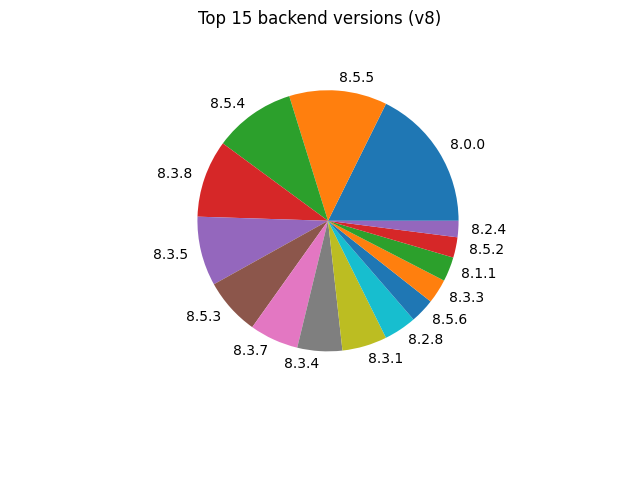

Backend version,Count
8.0.0,35
8.5.5,24
8.5.4,20
8.3.8,19
8.3.5,17
8.5.3,14
8.3.7,12
8.3.4,11
8.3.1,11
8.2.8,8


Count: 29


In [4]:
with Apps.init(cache_dir) as apps:
    backend_versions = apps.where(lambda app: app.env == "prod" and app.backend_version.major == 8) \
    .group_by({"Backend version": lambda app: app.backend_version}) \
    .select({"Count": lambda apps: apps.length}) \
    .order_by(lambda apps: (apps.length, apps.groupings["Backend version"]), reverse=True)
    
    backend_versions.limit(15).pie(title="Top 15 backend versions (v8)", x="Backend version", y="Count")
    backend_versions.table()